In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


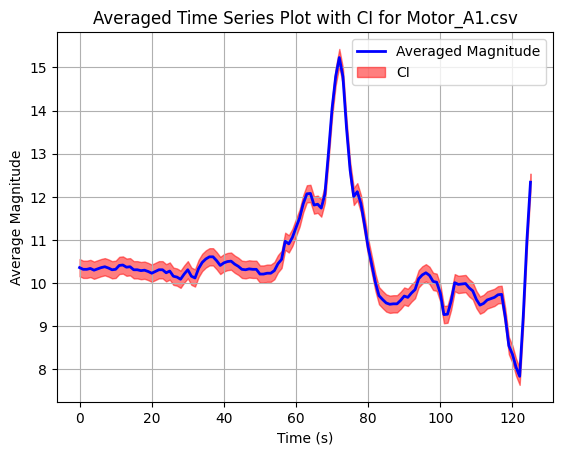

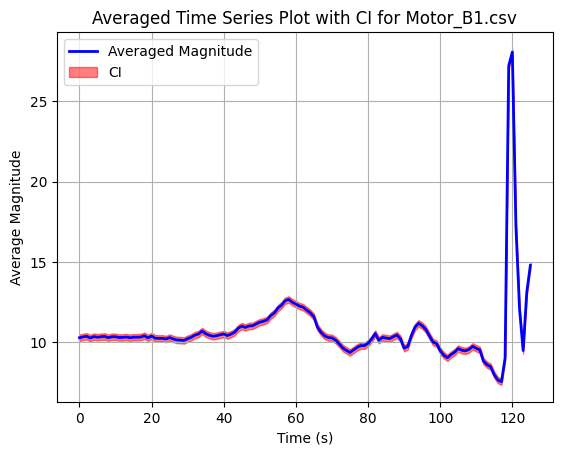

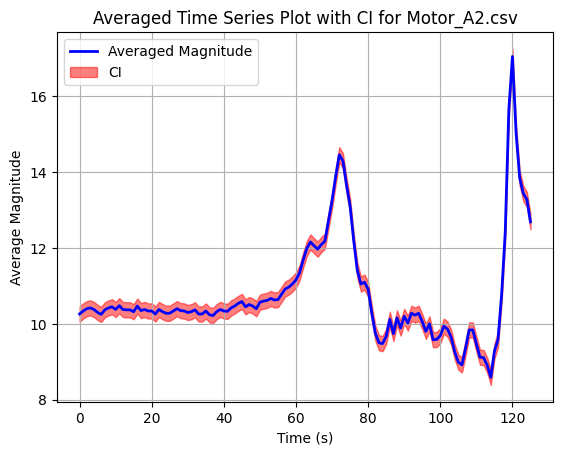

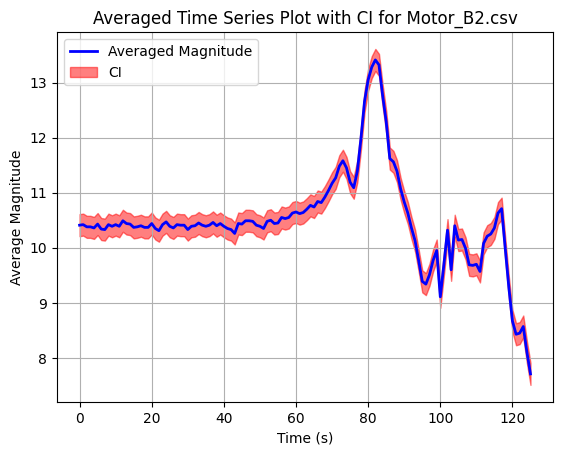

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names
# csv_files = ['Motor_Love_A1.csv', 'Motor_Love_B1.csv', 'Motor_Love_A2.csv', 'Motor_Love_B2.csv']
csv_files = ['drive/MyDrive/project_csv_data/Motor_A1.csv', 'drive/MyDrive/project_csv_data/Motor_B1.csv',
             'drive/MyDrive/project_csv_data/Motor_A2.csv', 'drive/MyDrive/project_csv_data/Motor_B2.csv']

# Define the time interval for averaging (e.g., 2 seconds)
interval_duration = 0.025  # in seconds

# Define the confidence interval level (e.g., 95%)
confidence_level = 0.95

# Define the CI width (half of the confidence interval width)
ci_width = 0.2

# Create a list to store the results
results = []

for csv_file in csv_files:
    # Read data from the CSV file using pandas
    data_table = pd.read_csv(csv_file, delimiter=',').values

    # Extract time and magnitude from the CSV file
    # time = (data_table[:, -1] - data_table[:, -1][0]) / 100
    time = np.arange(0, 126, 1).flatten()
    magnitude = data_table[:, -2]


    def avg_cycle(axis):
      cycle1 = []

      for i in range(126):
        sum = 0;
        count = 0
        for j in range(i, len(axis), 126):
          sum += axis[i]
          count += 1
        cycle1.append(sum/count)

      cycle1 = pd.DataFrame(cycle1)
      return cycle1


    average_magnitude= avg_cycle(magnitude).values.flatten()

    # # Calculate the number of intervals
    # num_intervals = int(np.floor(np.max(time) / interval_duration))

    # # Initialize arrays to store the averaged data
    # average_time = np.zeros(num_intervals)
    # average_magnitude = np.zeros(num_intervals)

    # # Loop through the intervals and calculate the averages
    # for j in range(num_intervals):
    #     interval_start = j * interval_duration
    #     interval_end = (j + 1) * interval_duration

    #     indices_in_interval = np.where((time >= interval_start) & (time < interval_end))

    #     average_time[j] = np.mean(time[indices_in_interval])
    #     average_magnitude[j] = np.mean(magnitude[indices_in_interval])

    # Calculate the confidence interval bounds
    ci_lower = average_magnitude - ci_width
    ci_upper = average_magnitude + ci_width

    # Store the results in a dictionary
    result = {
        'csv_file': csv_file,
        'time': time,
        'magnitude': average_magnitude,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

    # Store the result in the list
    results.append(result)

# Create individual plots for each CSV file
for result in results:
    # Create the averaged time series plot with CI
    plt.figure()
    plt.plot(result['time'], result['magnitude'], 'b', linewidth=2)
    plt.fill_between(result['time'], result['ci_lower'], result['ci_upper'], color='r', alpha=0.5)
    plt.title(f'Averaged Time Series Plot with CI for {result["csv_file"][-12:]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Average Magnitude')
    plt.grid(True)
    plt.legend(['Averaged Magnitude', 'CI'])
    plt.show()
